## Project Name – Santander Customer Transaction Prediction

### In this challenge, we need to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.

In [2]:
# Load all the packages required for the analysis
library(tidyverse)
library(ggplot2) # Visualisation

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [14]:
############################################Explore training and testing data##########################################
## Read the data
train_df <- read.csv("./train.csv", stringsAsFactors=FALSE)
test_df <- read.csv("./test.csv", stringsAsFactors=FALSE)
dim(train_df)
dim(test_df)

[1] 200000    202

[1] 200000    201

### There are 200,000 observations in the training and testing dataset. In addition to this there is also the target column in training data which has two boolean values, 0 or 1. and  200 independant variables in both training and testing dataset

In [12]:
head(train_df)

ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,⋯,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,⋯,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,⋯,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,⋯,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,⋯,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,⋯,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,⋯,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602


In [4]:

head(test_df)


ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,⋯,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,⋯,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,⋯,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,⋯,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,⋯,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,⋯,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
test_5,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.8790,⋯,-2.1115,7.1178,-0.4249,8.8781,14.9438,-2.2151,-6.0233,9.8117,17.1127,10.8240


### From the following bar graph we can see we have imbalanced training dataset

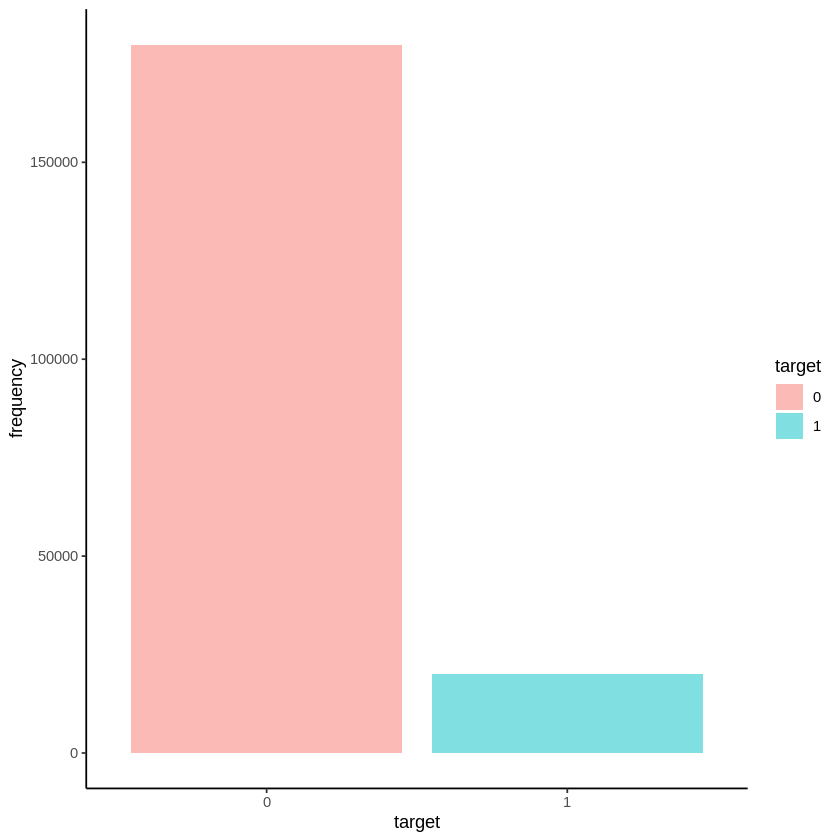

In [7]:
target_df <- data.frame(table(train_df$target))
colnames(target_df) <- c("target", "frequency")
ggplot(data=target_df, aes(x=target, y=frequency, fill=target)) +
  geom_bar(position = 'dodge', stat='identity', alpha=0.5) +
  theme_classic()

### Histogram: Displays the distribution of all numerical features per each class

The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following object is masked from package:ggplot2:

    mpg



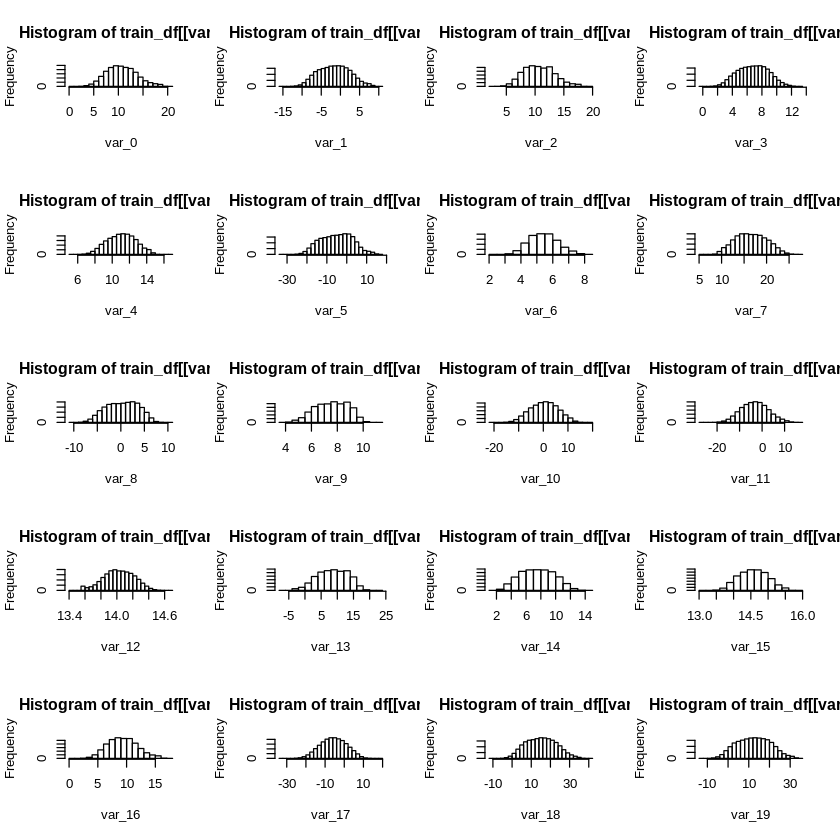

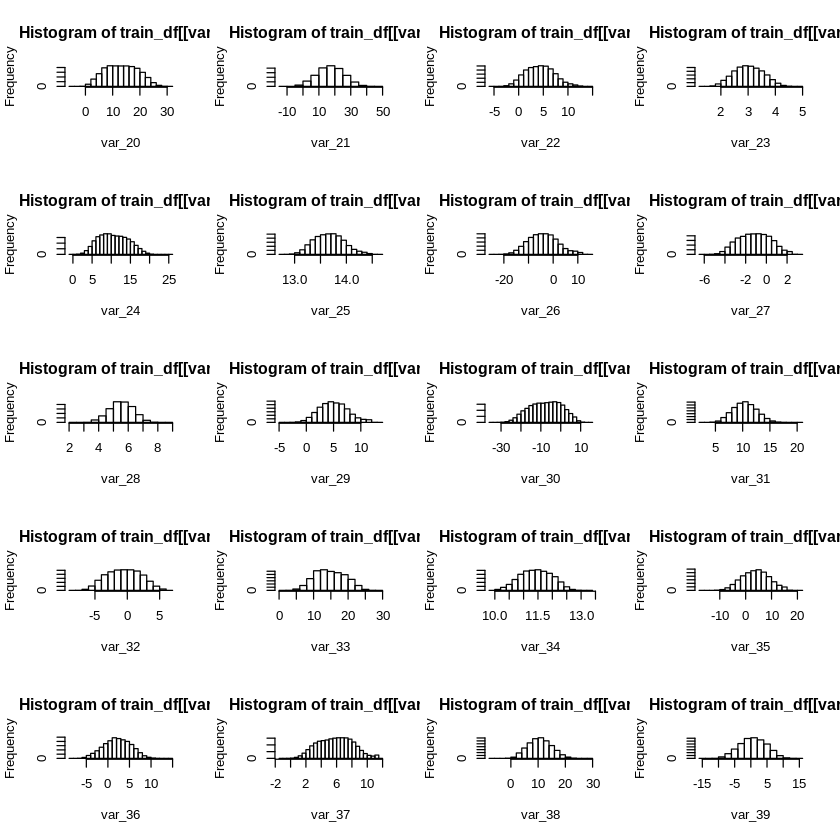

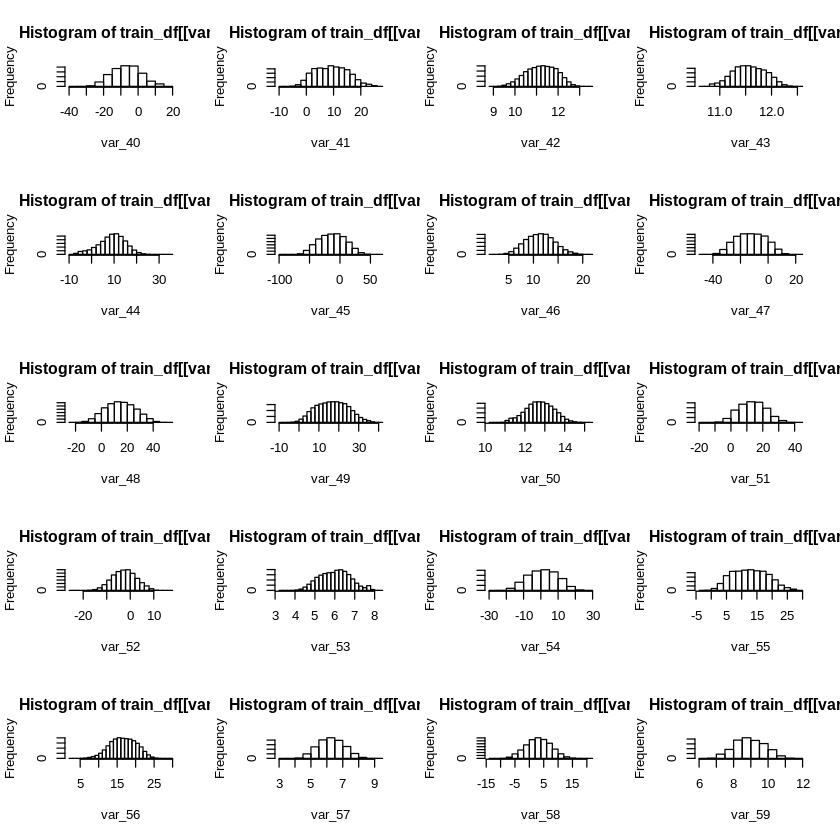

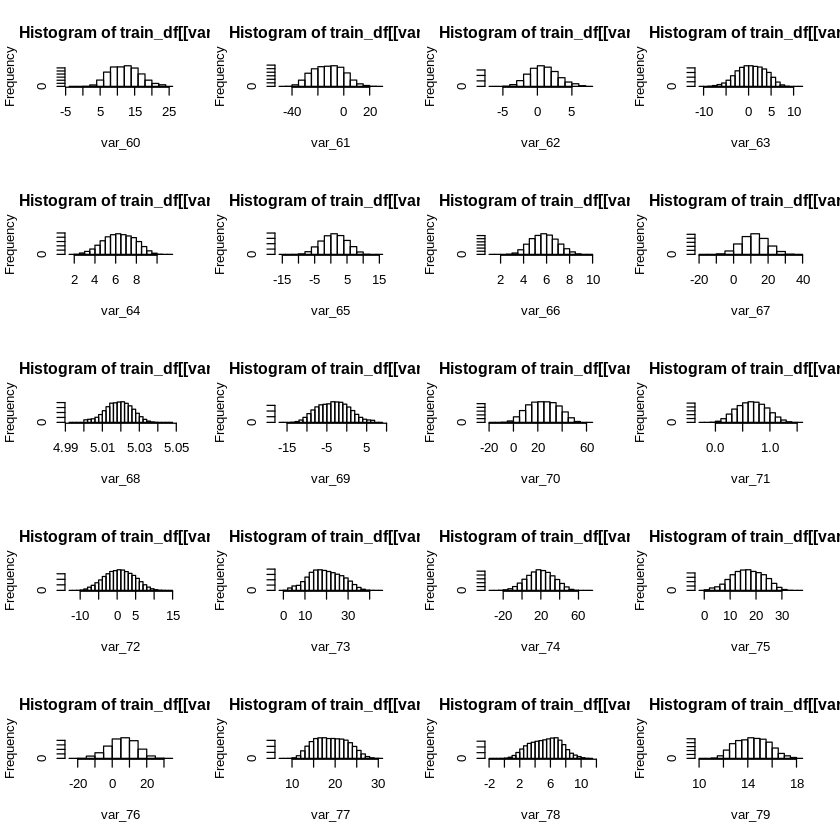

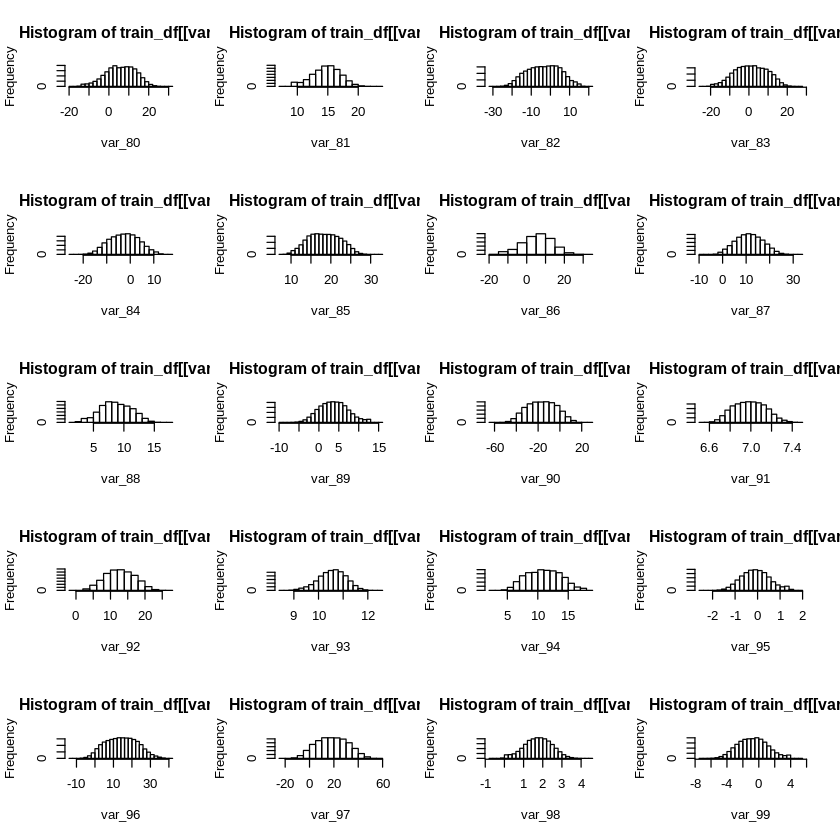

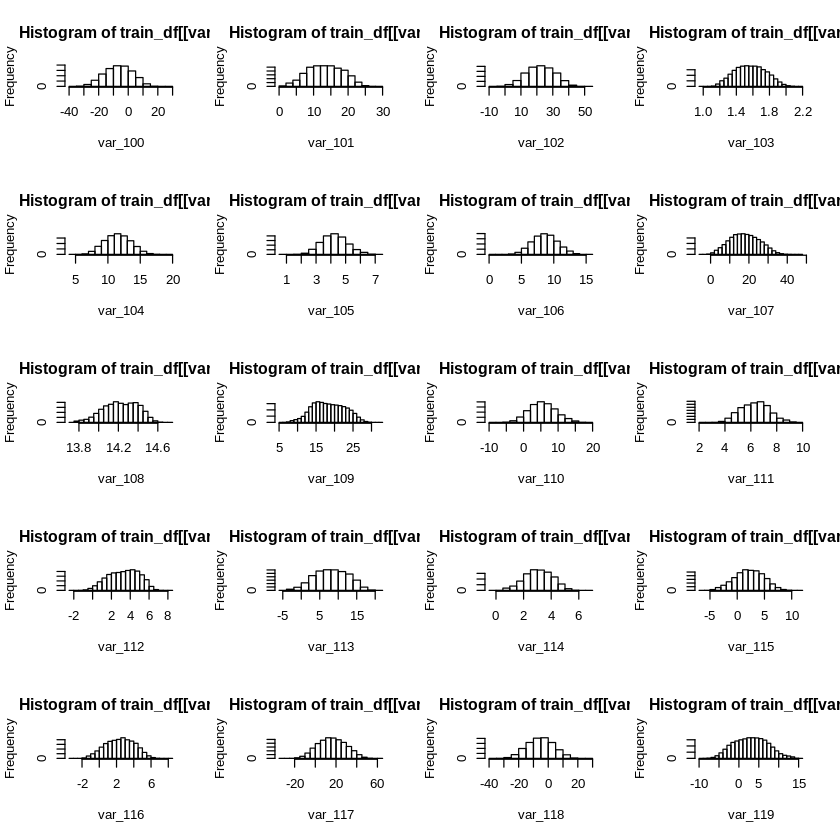

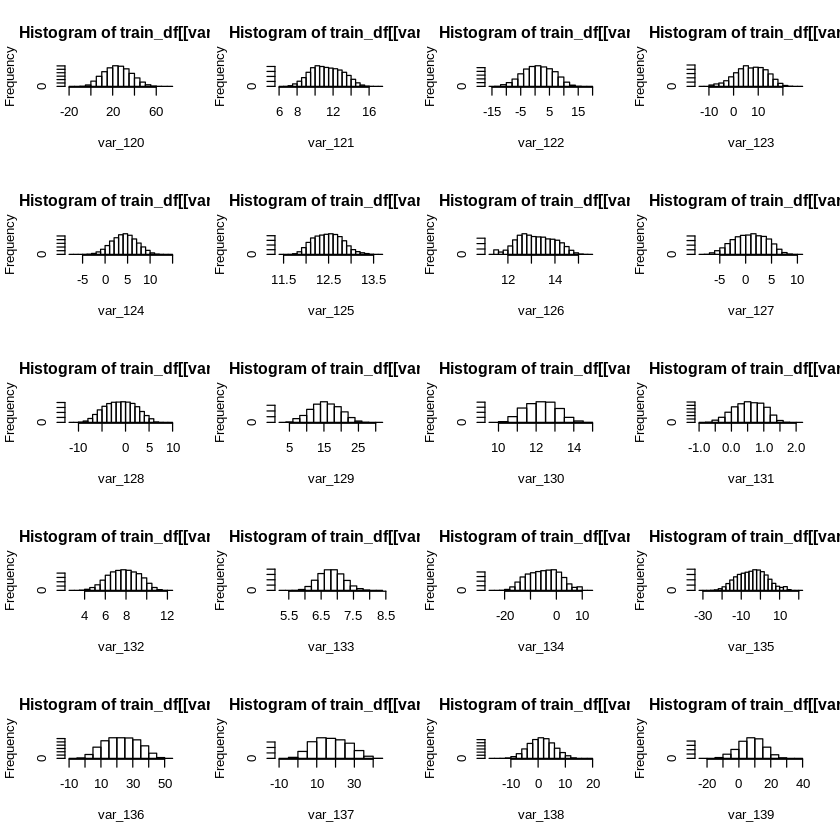

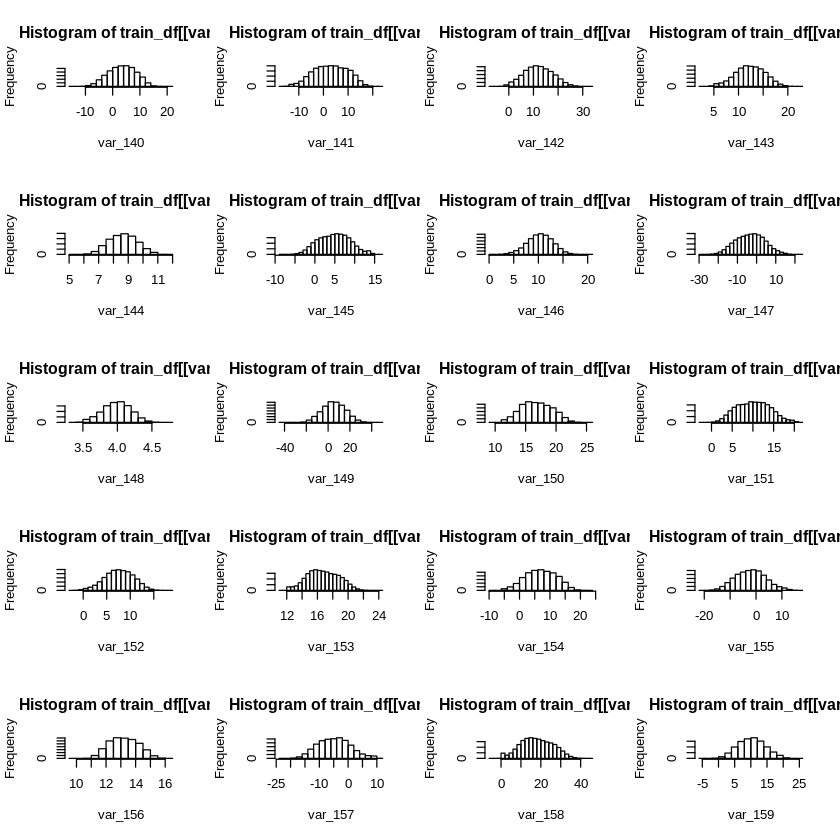

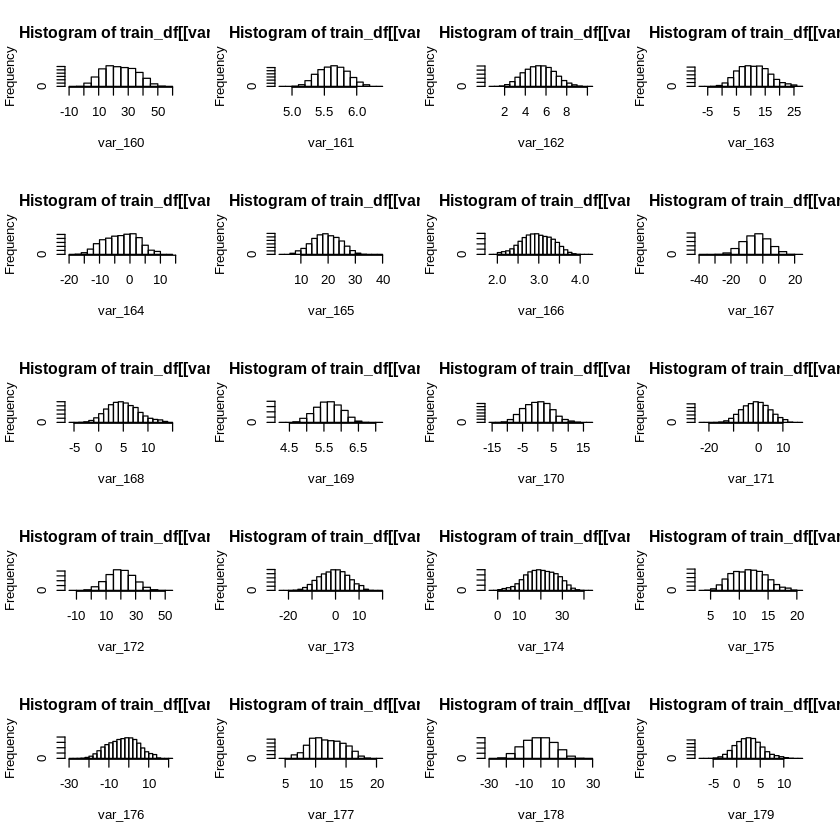

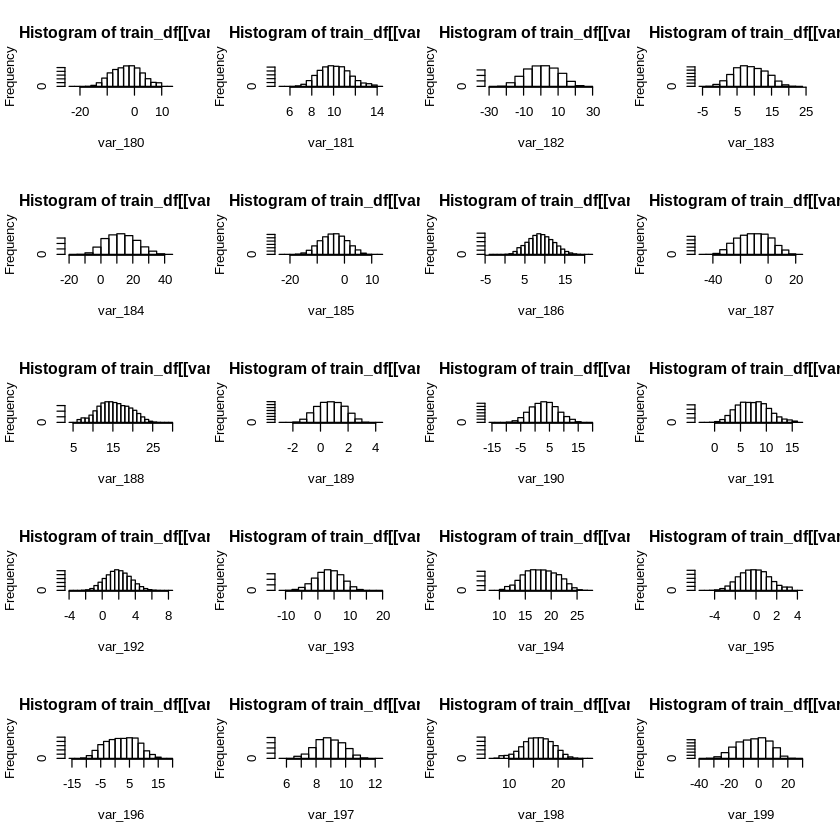

In [6]:


attach(mtcars)
par(mfrow=c(5,4)) 
# hist(train_df$var_0)
# hist(train_df$var_1)
# hist(train_df$var_2)
for (var in names(train_df)[c(3:202)]){
    hist(train_df[[var]], xlab=var)
} 


### from above graphs we can see that almost all features follows normalised distribution

Columns,Missing_percentage
<chr>,<dbl>
ID_code,0
target,0
var_0,0
var_1,0
var_2,0
var_3,0
var_4,0
var_5,0
var_6,0


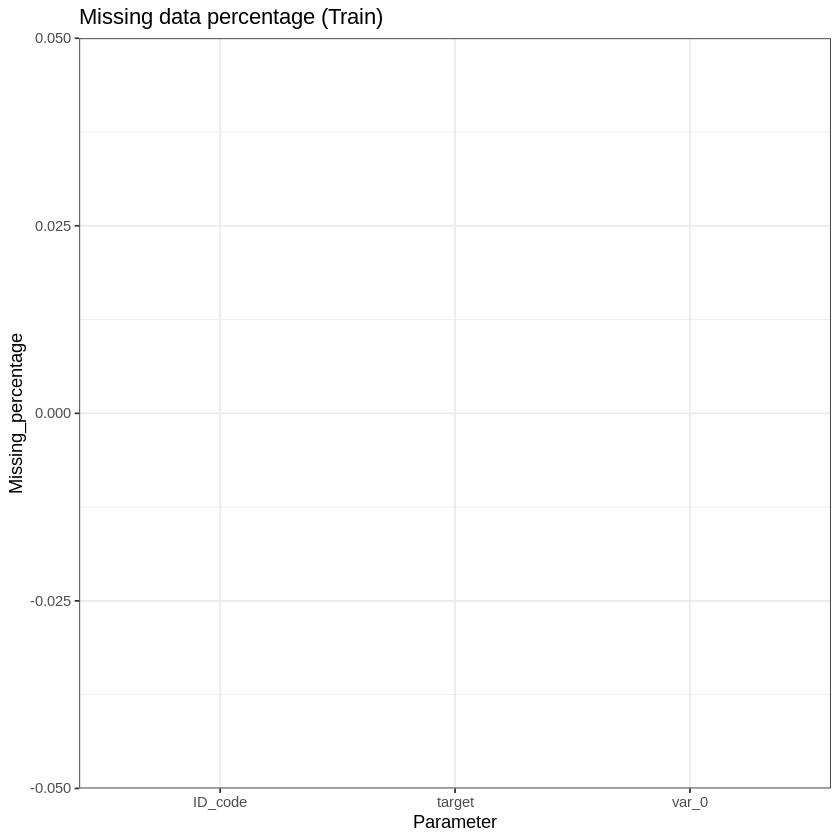

In [13]:
#######################################Missing Values Analysis#################################
missing_val = data.frame(apply(train_df,2,function(x){sum(is.na(x))}))
missing_val$Columns = row.names(missing_val)
names(missing_val)[1] =  "Missing_percentage"
missing_val$Missing_percentage = (missing_val$Missing_percentage/nrow(train_df)) * 100
missing_val = missing_val[order(-missing_val$Missing_percentage),]
row.names(missing_val) = NULL
missing_val = missing_val[,c(2,1)]
missing_val
ggplot(data = missing_val[1:3,], aes(x=reorder(Columns, -Missing_percentage),y = Missing_percentage))+
   geom_bar(stat = "identity",fill = "grey")+xlab("Parameter")+
   ggtitle("Missing data percentage (Train)") + theme_bw()


Columns,Missing_percentage
<chr>,<dbl>
ID_code,0
var_0,0
var_1,0
var_2,0
var_3,0
var_4,0
var_5,0
var_6,0
var_7,0


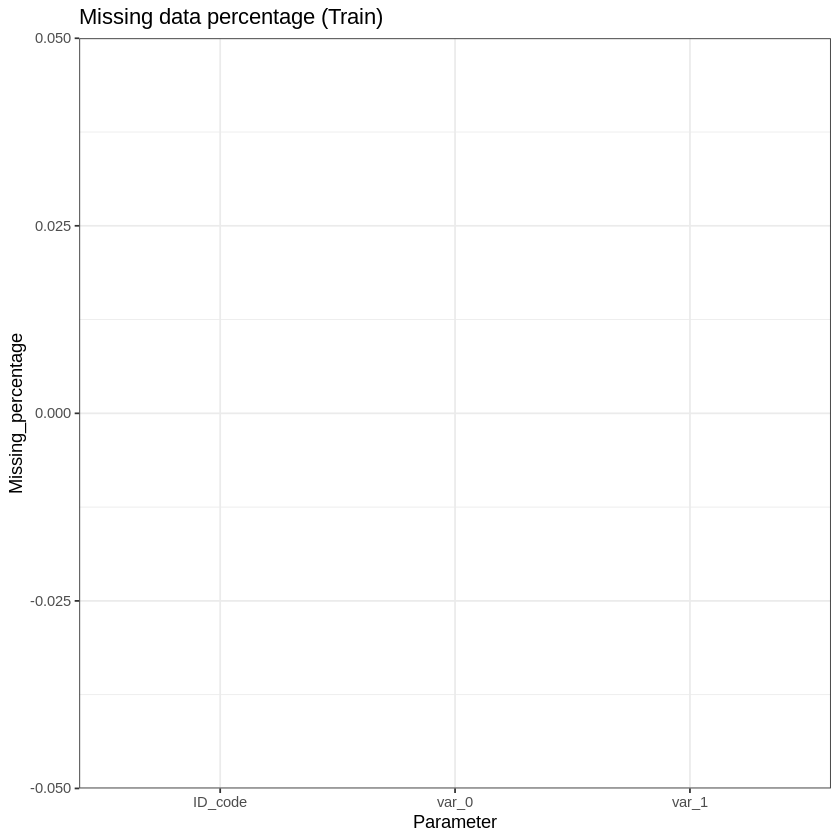

In [8]:
missing_val = data.frame(apply(test_df,2,function(x){sum(is.na(x))}))
missing_val$Columns = row.names(missing_val)
names(missing_val)[1] =  "Missing_percentage"
missing_val$Missing_percentage = (missing_val$Missing_percentage/nrow(train_df)) * 100
missing_val = missing_val[order(-missing_val$Missing_percentage),]
row.names(missing_val) = NULL
missing_val = missing_val[,c(2,1)]
missing_val
ggplot(data = missing_val[1:3,], aes(x=reorder(Columns, -Missing_percentage),y = Missing_percentage))+
   geom_bar(stat = "identity",fill = "grey")+xlab("Parameter")+
   ggtitle("Missing data percentage (Train)") + theme_bw()


In [15]:
###############################################outlier analysis##################################################

numeric_index = sapply(train_df,is.numeric) #selecting only numeric
numeric_data = train_df[,numeric_index]

cnames = colnames(numeric_data)

# #Replace all outliers with NA and impute
# #create NA on "custAge
for(i in cnames[-1]){
    val=train_df[,i][train_df[,i] %in% boxplot.stats(train_df[,i])$out] #outlier values
    train_df[,i][train_df[,i] %in% val]= NA  # Replace outliers with NA 
}

In [16]:
## Plotting plots together
missing_val = data.frame(apply(train_df,2,function(x){sum(is.na(x))}))
missing_val


,apply.train_df..2..function.x...
,<int>
ID_code,0
target,0
var_0,104
var_1,6
var_2,49
var_3,22
var_4,76
var_5,4
var_6,113


In [17]:
# Impute outliers with mean value
for(i in 1:ncol(train_df)){
  train_df[is.na(train_df[,i]), i] <- mean(train_df[,i], na.rm = TRUE)
}

Warning message in mean.default(train_df[, i], na.rm = TRUE):
“argument is not numeric or logical: returning NA”

In [18]:
head(train_df)

ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,⋯,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,⋯,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,⋯,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,⋯,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,⋯,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,⋯,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,⋯,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602


In [19]:
#############################################Feature Selection###################################################
#Let us see correlation between the attributes
# install.packages("corrgram")
# library(corrgram)
numeric_index= sapply(train_df,is.numeric) #selecting only numeric


In [20]:
train_df$target<-as.numeric(train_df$target)
train_correlations <- cor(train_df[,c(2:202)])
train_correlations



,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,⋯,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.0000000000,5.253472e-02,5.036960e-02,5.585854e-02,1.110990e-02,1.092479e-02,3.096018e-02,6.686773e-02,-0.0030501129,1.957457e-02,⋯,5.612975e-02,4.697387e-02,-4.318207e-02,-1.733527e-02,-2.282836e-02,0.0282783954,2.360780e-02,-0.0353849696,-0.0530379339,2.555542e-02
var_0,0.0525347238,1.000000e+00,-5.176865e-04,6.458643e-03,3.499149e-03,1.336080e-03,3.415320e-03,7.420855e-03,0.0023259584,5.072480e-03,⋯,2.720161e-03,1.757865e-04,-5.519506e-03,1.552878e-03,-1.520353e-03,0.0021302510,4.112608e-03,-0.0007214075,-0.0059465601,3.674994e-03
var_1,0.0503696032,-5.176865e-04,1.000000e+00,4.060420e-03,2.418031e-05,1.323930e-04,-9.072044e-04,3.261139e-03,0.0014414408,4.160315e-03,⋯,6.327809e-03,3.330403e-03,-2.850280e-03,9.749310e-04,-2.595843e-03,-0.0008829795,-3.433972e-04,-0.0042616541,-0.0049919795,2.319636e-03
var_2,0.0558585358,6.458643e-03,4.060420e-03,1.000000e+00,1.007775e-03,6.206326e-04,1.754570e-03,9.283694e-04,-0.0009706660,2.765832e-03,⋯,5.765677e-05,1.526211e-03,-3.331618e-03,1.517058e-04,2.010818e-03,-0.0008953046,4.114012e-03,0.0010131036,-0.0009064412,3.853779e-03
var_3,0.0111098982,3.499149e-03,2.418031e-05,1.007775e-03,1.000000e+00,-3.010952e-04,3.174832e-03,-5.693194e-04,0.0025155960,3.637596e-03,⋯,-1.057418e-04,2.167934e-03,-1.405137e-03,-1.305168e-03,-1.078738e-03,0.0011264616,-2.877678e-03,0.0012720148,-0.0016332656,5.771129e-04
var_4,0.0109247890,1.336080e-03,1.323930e-04,6.206326e-04,-3.010952e-04,1.000000e+00,-1.226677e-03,-1.214738e-05,0.0044176245,1.104992e-03,⋯,1.612499e-03,4.383515e-03,3.274091e-03,7.271780e-04,1.319814e-05,0.0038597726,4.003348e-04,0.0001492286,-0.0015017286,-7.781596e-04
var_5,0.0309601757,3.415320e-03,-9.072044e-04,1.754570e-03,3.174832e-03,-1.226677e-03,1.000000e+00,2.581052e-03,-0.0010341850,8.254209e-05,⋯,1.229988e-03,3.717465e-06,7.633446e-04,-1.365609e-03,-2.499799e-03,-0.0011939334,2.854764e-03,-0.0004765736,-0.0011355527,2.872568e-03
var_6,0.0668677303,7.420855e-03,3.261139e-03,9.283694e-04,-5.693194e-04,-1.214738e-05,2.581052e-03,1.000000e+00,-0.0021809803,-1.292720e-03,⋯,9.586075e-04,5.740743e-03,-2.254420e-03,1.764114e-03,-8.359697e-04,0.0010442800,5.573547e-03,-0.0036862914,-0.0031842436,6.021094e-03
var_7,-0.0030501129,2.325958e-03,1.441441e-03,-9.706660e-04,2.515596e-03,4.417624e-03,-1.034185e-03,-2.180980e-03,1.0000000000,8.994986e-04,⋯,-2.729109e-04,-3.967028e-03,1.260869e-03,3.373598e-03,-3.606795e-04,0.0023831825,1.071543e-03,0.0036469628,0.0008412513,-1.414220e-03
var_8,0.0195745733,5.072480e-03,4.160315e-03,2.765832e-03,3.637596e-03,1.104992e-03,8.254209e-05,-1.292720e-03,0.0008994986,1.000000e+00,⋯,2.861312e-03,-9.085631e-04,-1.466113e-04,8.995790e-04,1.358609e-03,0.0010990947,-3.259921e-03,-0.0045158288,0.0031963331,7.680984e-04


In [21]:

test_correlations <- cor(test_df[,c(2:201)])
test_correlations

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,⋯,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000e+00,0.0042335145,2.624971e-03,0.0008471226,-4.251666e-03,0.0022741497,1.930051e-03,-4.654152e-03,-3.669056e-03,1.426791e-03,⋯,0.0026624615,0.0011506928,1.101855e-03,0.0027557330,-3.508987e-03,0.0014455782,-0.0007540715,-3.818271e-04,-4.068108e-03,0.0012479309
var_1,4.233514e-03,1.0000000000,2.911984e-03,-0.0021477898,7.162270e-04,0.0013929934,3.566747e-03,3.023687e-03,7.781143e-04,-2.642757e-03,⋯,0.0020323094,0.0034771557,-3.454402e-03,0.0003453238,1.260690e-04,0.0013390613,-0.0016274512,-2.838935e-03,-3.023831e-03,0.0018611361
var_2,2.624971e-03,0.0029119843,1.000000e+00,-0.0058815391,3.657207e-03,0.0002834116,-1.140732e-03,-2.726431e-04,1.230733e-03,4.115227e-05,⋯,-0.0017653504,0.0011436002,-5.495600e-03,0.0020270556,-2.395976e-03,0.0013329947,-0.0023995578,-2.726007e-03,-1.536963e-03,0.0002287068
var_3,8.471226e-04,-0.0021477898,-5.881539e-03,1.0000000000,-9.588142e-04,0.0016444395,-3.074175e-03,1.945318e-03,-1.442812e-03,-1.290507e-03,⋯,-0.0016300264,0.0021191094,1.269334e-03,-0.0061363644,2.885169e-04,0.0016005536,0.0031773538,2.780267e-03,-2.624764e-03,-0.0030342623
var_4,-4.251666e-03,0.0007162270,3.657207e-03,-0.0009588142,1.000000e+00,0.0048215215,-3.284120e-03,-1.668071e-04,3.138067e-03,9.274888e-05,⋯,-0.0031058791,0.0024728021,-7.341585e-04,-0.0007541481,-4.266055e-04,0.0030458212,-0.0013172914,4.247895e-04,-2.145896e-03,0.0004006501
var_5,2.274150e-03,0.0013929934,2.834116e-04,0.0016444395,4.821522e-03,1.0000000000,-3.554599e-03,2.836662e-03,1.954658e-03,2.249102e-03,⋯,-0.0006597377,0.0026618019,-2.652047e-03,-0.0012088233,9.974891e-04,0.0026762003,-0.0024451867,-3.664875e-03,-4.626368e-03,0.0016380913
var_6,1.930051e-03,0.0035667474,-1.140732e-03,-0.0030741754,-3.284120e-03,-0.0035545993,1.000000e+00,1.845252e-03,2.114786e-03,-1.948044e-03,⋯,0.0025207091,0.0008675911,-2.711951e-03,-0.0044936516,-2.502347e-03,0.0009797075,-0.0016016531,-3.378162e-03,9.427481e-04,0.0020227426
var_7,-4.654152e-03,0.0030236867,-2.726431e-04,0.0019453183,-1.668071e-04,0.0028366620,1.845252e-03,1.000000e+00,-6.499807e-04,2.838648e-03,⋯,-0.0005086568,0.0038281022,1.510923e-03,0.0016164341,-2.228916e-03,0.0048119564,0.0016451791,1.451452e-03,-8.098279e-04,0.0006235573
var_8,-3.669056e-03,0.0007781143,1.230733e-03,-0.0014428120,3.138067e-03,0.0019546584,2.114786e-03,-6.499807e-04,1.000000e+00,-2.117846e-03,⋯,-0.0002159480,0.0002437535,-2.102828e-05,-0.0033015465,9.763977e-05,-0.0032409598,0.0027649653,-2.954463e-03,-1.544332e-03,-0.0003698523
var_9,1.426791e-03,-0.0026427568,4.115227e-05,-0.0012905069,9.274888e-05,0.0022491024,-1.948044e-03,2.838648e-03,-2.117846e-03,1.000000e+00,⋯,0.0005531020,0.0009944073,-1.879431e-03,0.0009000436,1.122292e-03,-0.0028538594,0.0013254285,2.240899e-03,-2.259159e-03,0.0015144162


### We can observed that the correlation between the training and testing attributes is very small. 
### There are 200 features that are mostly un-correlated between them.

In [22]:
##################################Feature Scaling################################################
#Normality check
for(i in cnames[-1]){
    
    train_df[,i] = (train_df[,i] - min(train_df[,i]))/
                                (max(train_df[,i] - min(train_df[,i]))) 
}


In [23]:
for(i in cnames[-1]){
    
    test_df[,i] = (test_df[,i] - min(test_df[,i]))/
                                (max(test_df[,i] - min(test_df[,i]))) 
}

### Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [24]:
head(train_df)

ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,⋯,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
train_0,0,0.4021768,0.2920740,0.5848318,0.3607499,0.5419442,0.4286163,0.4459501,0.5968531,⋯,0.5487376,0.3058826,0.6477100,0.4242327,0.5218382,0.2218936,0.6789810,0.4329306,0.3129182,0.5358626
train_1,0,0.5518127,0.4009248,0.7134109,0.3849098,0.6369509,0.7801826,0.5476494,0.4941425,⋯,0.6727947,0.5217876,0.5806193,0.8362049,0.3576564,0.7772167,0.6866137,0.4750229,0.6422197,0.5835937
train_2,0,0.3838028,0.4587365,0.5961954,0.5892733,0.4493930,0.4329165,0.8153977,0.3999961,⋯,0.4895584,0.6406870,0.4697564,0.4240014,0.6854518,0.9160318,0.2363369,0.3776541,0.4276071,0.5591996
train_3,0,0.5262332,0.4832331,0.3899955,0.5323751,0.6603891,0.5889806,0.5926151,0.4151857,⋯,0.5499447,0.3506531,0.3541229,0.4122391,0.7614049,0.3631397,0.3468097,0.7557564,0.6194048,0.4118264
train_4,0,0.4551371,0.5108026,0.6485380,0.4868141,0.6279930,0.6812439,0.6124040,0.6275171,⋯,0.3194835,0.6252234,0.2486860,0.7580243,0.2438781,0.3328781,0.5575065,0.6083960,0.6210408,0.4147939
train_5,0,0.5504007,0.4763696,0.6309652,0.6491507,0.4893980,0.7051953,0.3271556,0.4299337,⋯,0.1331561,0.4574908,0.9092752,0.3685934,0.3318891,0.6515964,0.3253963,0.6576780,0.3011416,0.4783193


In [25]:
##############################################Model Development#############################################
act_train_df<-subset(train_df,select=cnames)

In [26]:

## you need to specify that the variable is a factor, otherwise R will treat it as a numeric variable. Use as.factor to do this or factor to also specify labels. The first level of the factor is typically treated as the reference category (in your case 0, or male).

act_train_df$target = as.factor(act_train_df$target)
head(act_train_df)

target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,⋯,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.4021768,0.2920740,0.5848318,0.3607499,0.5419442,0.4286163,0.4459501,0.5968531,0.2517625,⋯,0.5487376,0.3058826,0.6477100,0.4242327,0.5218382,0.2218936,0.6789810,0.4329306,0.3129182,0.5358626
0,0.5518127,0.4009248,0.7134109,0.3849098,0.6369509,0.7801826,0.5476494,0.4941425,0.6522510,⋯,0.6727947,0.5217876,0.5806193,0.8362049,0.3576564,0.7772167,0.6866137,0.4750229,0.6422197,0.5835937
0,0.3838028,0.4587365,0.5961954,0.5892733,0.4493930,0.4329165,0.8153977,0.3999961,0.2517972,⋯,0.4895584,0.6406870,0.4697564,0.4240014,0.6854518,0.9160318,0.2363369,0.3776541,0.4276071,0.5591996
0,0.5262332,0.4832331,0.3899955,0.5323751,0.6603891,0.5889806,0.5926151,0.4151857,0.2050500,⋯,0.5499447,0.3506531,0.3541229,0.4122391,0.7614049,0.3631397,0.3468097,0.7557564,0.6194048,0.4118264
0,0.4551371,0.5108026,0.6485380,0.4868141,0.6279930,0.6812439,0.6124040,0.6275171,0.8070786,⋯,0.3194835,0.6252234,0.2486860,0.7580243,0.2438781,0.3328781,0.5575065,0.6083960,0.6210408,0.4147939
0,0.5504007,0.4763696,0.6309652,0.6491507,0.4893980,0.7051953,0.3271556,0.4299337,0.6740309,⋯,0.1331561,0.4574908,0.9092752,0.3685934,0.3318891,0.6515964,0.3253963,0.6576780,0.3011416,0.4783193


In [28]:

#######################################Decision tree for classification######################################
#Develop Model on training data
library(rpart)



In [29]:
install.packages("Metrics")
library(Metrics)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [30]:
install.packages("caret")
library(caret)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice

Attaching package: ‘caret’

The following objects are masked from ‘package:Metrics’:

    precision, recall

The following object is masked from ‘package:purrr’:

    lift



In [31]:
train.index = createDataPartition(act_train_df$target, p = .80, list = FALSE)
training_data = act_train_df[ train.index,]
testing_data  = act_train_df[-train.index,]

In [32]:
library(randomForest)

#########################################Random Forest model#################################################

rf_2=randomForest(target ~ . , data = training_data, ntree=50)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



In [33]:
rf_2





Call:
 randomForest(formula = target ~ ., data = training_data, ntree = 50) 
               Type of random forest: classification
                     Number of trees: 50
No. of variables tried at each split: 14

        OOB estimate of  error rate: 10%
Confusion matrix:
       0   1  class.error
0 143842  80 0.0005558566
1  15916 163 0.9898625536

In [35]:

pred <- predict(rf_2, testing_data[2:201], type = "class")


In [36]:
# save the model to disk
saveRDS(rf_2, "./RF_model.rds")

In [37]:
install.packages("e1071")
library(e1071)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [39]:
##Evaluate the performance of classification model
ConfMatrix_RF = table(testing_data$target, pred)
confusionMatrix(ConfMatrix_RF)

Confusion Matrix and Statistics

   pred
        0     1
  0 35979     1
  1  4015     4
                                          
               Accuracy : 0.8996          
                 95% CI : (0.8966, 0.9025)
    No Information Rate : 0.9999          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0017          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8996099       
            Specificity : 0.8000000       
         Pos Pred Value : 0.9999722       
         Neg Pred Value : 0.0009953       
             Prevalence : 0.9998750       
         Detection Rate : 0.8994975       
   Detection Prevalence : 0.8995225       
      Balanced Accuracy : 0.8498050       
                                          
       'Positive' Class : 0               
                                          

### From above Confusion Matrix we can see the random forest model accuracy is 89.96%


In [40]:
#######################################Logistic Regression classifier######################################################
logit_model = glm(target ~ ., data = training_data, family = "binomial")

In [41]:
# save the model to disk
saveRDS(logit_model, "./logit_model.rds")

In [42]:
#summary of the model
summary(logit_model)


Call:
glm(formula = target ~ ., family = "binomial", data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5889  -0.4015  -0.2330  -0.1245   3.7887  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.25127    0.39526 -10.756  < 2e-16 ***
var_0        0.93458    0.05395  17.323  < 2e-16 ***
var_1        1.02863    0.05778  17.801  < 2e-16 ***
var_2        1.00679    0.05476  18.386  < 2e-16 ***
var_3        0.23250    0.05808   4.003 6.25e-05 ***
var_4        0.23661    0.05651   4.187 2.83e-05 ***
var_5        0.61230    0.05694  10.753  < 2e-16 ***
var_6        1.32584    0.05462  24.272  < 2e-16 ***
var_7       -0.02982    0.05769  -0.517 0.605166    
var_8        0.35335    0.05852   6.038 1.56e-09 ***
var_9       -0.80032    0.05584 -14.332  < 2e-16 ***
var_10      -0.05673    0.05629  -1.008 0.313560    
var_11       0.41556    0.05436   7.644 2.10e-14 ***
var_12      -1.19601    0.05392 -22.181  < 2e-16 ***


In [43]:
#predict using logistic regression
logit_Predictions = predict(logit_model, newdata = testing_data[2:201], type = "response")
#convert prob
logit_Predictions = ifelse(logit_Predictions > 0.5, 1, 0)


In [120]:
##Evaluate the performance of classification model
ConfMatrix_LR = table(testing_data$target, logit_Predictions)
confusionMatrix(ConfMatrix_LR)

Confusion Matrix and Statistics

   logit_Predictions
        0     1
  0 35510   470
  1  2963  1056
                                          
               Accuracy : 0.9142          
                 95% CI : (0.9114, 0.9169)
    No Information Rate : 0.9618          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3446          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9230          
            Specificity : 0.6920          
         Pos Pred Value : 0.9869          
         Neg Pred Value : 0.2628          
             Prevalence : 0.9618          
         Detection Rate : 0.8878          
   Detection Prevalence : 0.8995          
      Balanced Accuracy : 0.8075          
                                          
       'Positive' Class : 0               
                                      

In [44]:
mean(testing_data$target==logit_Predictions)

[1] 0.9132728

### From above Confusion Matrix we can see the logistic regression classifier model accuracy is 91.41%


In [45]:
########################################Develop naive bayes model###############################################
NB_model = naiveBayes(target ~ ., data = training_data)



In [46]:
# save the model to disk
saveRDS(NB_model, "./NB_model.rds")

In [123]:
#predict on test cases #raw
NB_Predictions = predict(NB_model, testing_data[2:201], type = 'class')

#Look at confusion matrix
Conf_matrix = table(observed = testing_data$target, predicted = NB_Predictions)
confusionMatrix(Conf_matrix)


Confusion Matrix and Statistics

        predicted
observed     0     1
       0 35420   560
       1  2554  1465
                                          
               Accuracy : 0.9221          
                 95% CI : (0.9195, 0.9248)
    No Information Rate : 0.9494          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4476          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9327          
            Specificity : 0.7235          
         Pos Pred Value : 0.9844          
         Neg Pred Value : 0.3645          
             Prevalence : 0.9494          
         Detection Rate : 0.8855          
   Detection Prevalence : 0.8995          
      Balanced Accuracy : 0.8281          
                                          
       'Positive' Class : 0               
                          

### From above Confusion Matrix we can see the naive bayes model classifier model accuracy is 92.21%

In [47]:
##########################predict the value of target column in the test set############################

# #predict on test cases #raw
predictions = predict(NB_model, test_df[2:201], type = 'class')


In [48]:
test_df$target = predictions

In [49]:



write.csv(test_df,'./final_test_data.csv')

In [51]:
final_test_data <- read.csv("./final_test_data.csv")
head(final_test_data)

X,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,⋯,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,test_0,0.4913959,0.9342858,0.6478675,0.7179666,0.5636756,0.5638851,0.5969176,0.5559920,⋯,0.7454964,0.1684221,0.4773133,0.2331484,0.7802227,0.6130809,0.7452098,0.4454256,0.4562905,0
2,test_1,0.3768608,0.6671593,0.5470722,0.3956276,0.3518531,0.5276528,0.6248994,0.5721176,⋯,0.5878579,0.3773345,0.7416347,0.3336224,0.5698455,0.4171787,0.6062363,0.6286984,0.2743523,0
3,test_2,0.2391720,0.1917965,0.4759183,0.5370773,0.4528130,0.8345539,0.4401176,0.6439584,⋯,0.7007347,0.4689976,0.4679901,0.1938325,0.7443985,0.2288841,0.1461138,0.6671010,0.2416441,0
4,test_3,0.3771770,0.5616882,0.5909199,0.5011470,0.3185346,0.6872705,0.4474623,0.6577897,⋯,0.6004968,0.4405909,0.5162348,0.3126636,0.8541021,0.5993959,0.5011136,0.3223750,0.5232227,0
5,test_4,0.5203188,0.6103813,0.7197489,0.5904561,0.3429549,0.4260751,0.7629024,0.2166207,⋯,0.6055011,0.4075834,0.5092286,0.5478804,0.4891354,0.2940911,0.1831909,0.3679389,0.4493893,0
6,test_5,0.2619191,0.5220173,0.3820917,0.5386421,0.8303183,0.4240472,0.3335962,0.4007910,⋯,0.4980678,0.2570091,0.6985957,0.2995421,0.2851554,0.2652244,0.5964593,0.5276380,0.7464062,0
